## Loading packages needed

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
# For better visualization aesthetics
sns.set(style="whitegrid")


# Preprocessing of data

In [ ]:
# Define mapping dictionaries for each year
# Since column names are different for each year, we need to map them to a common set of column names
column_mappings = {
    '2015': {
        'Country': 'Country',
        'Region': 'Region',
        'Happiness Rank': 'Happiness_Rank',
        'Happiness Score': 'Happiness_Score',
        'Standard Error': 'Standard_Error',
        'Economy (GDP per Capita)': 'GDP_per_Capita',
        'Family': 'Family',
        'Health (Life Expectancy)': 'Health_Life_Expectancy',
        'Freedom': 'Freedom',
        'Trust (Government Corruption)': 'Trust_Government_Corruption',
        'Generosity': 'Generosity',
        'Dystopia Residual': 'Dystopia_Residual'
    },
    '2016': {
        'Country': 'Country',
        'Region': 'Region',
        'Happiness Rank': 'Happiness_Rank',
        'Happiness Score': 'Happiness_Score',
        'Lower Confidence Interval': 'Lower_Confidence_Interval',
        'Upper Confidence Interval': 'Upper_Confidence_Interval',
        'Economy (GDP per Capita)': 'GDP_per_Capita',
        'Family': 'Family',
        'Health (Life Expectancy)': 'Health_Life_Expectancy',
        'Freedom': 'Freedom',
        'Trust (Government Corruption)': 'Trust_Government_Corruption',
        'Generosity': 'Generosity',
        'Dystopia Residual': 'Dystopia_Residual'
    },
    '2017': {
        'Country': 'Country',
        'Happiness.Rank': 'Happiness_Rank',
        'Happiness.Score': 'Happiness_Score',
        'Whisker.high': 'Upper_Confidence_Interval',
        'Whisker.low': 'Lower_Confidence_Interval',
        'Economy..GDP.per.Capita.': 'GDP_per_Capita',
        'Family': 'Family',
        'Health..Life.Expectancy.': 'Health_Life_Expectancy',
        'Freedom': 'Freedom',
        'Generosity': 'Generosity',
        'Trust..Government.Corruption.': 'Trust_Government_Corruption',
        'Dystopia.Residual': 'Dystopia_Residual'
    },
    '2018': {
        'Overall rank': 'Happiness_Rank',
        'Country or region': 'Country',
        'Score': 'Happiness_Score',
        'GDP per capita': 'GDP_per_Capita',
        'Social support': 'Social_Support',
        'Healthy life expectancy': 'Health_Life_Expectancy',
        'Freedom to make life choices': 'Freedom',
        'Generosity': 'Generosity',
        'Perceptions of corruption': 'Trust_Government_Corruption'
    },
    '2019': {
        'Overall rank': 'Happiness_Rank',
        'Country or region': 'Country',
        'Score': 'Happiness_Score',
        'GDP per capita': 'GDP_per_Capita',
        'Social support': 'Social_Support',
        'Healthy life expectancy': 'Health_Life_Expectancy',
        'Freedom to make life choices': 'Freedom',
        'Generosity': 'Generosity',
        'Perceptions of corruption': 'Trust_Government_Corruption'
    }
}

# Define the years and corresponding file names
years = ['2015', '2016', '2017', '2018', '2019']
file_names = {
    '2015': '2015.csv',
    '2016': '2016.csv',
    '2017': '2017.csv',
    '2018': '2018.csv',
    '2019': '2019.csv'
}

# Initialize an empty list to store individual dataframes
df_list = []

for year in years:
    file_path = file_names[year]
    
    # Read the CSV file
    try:
        df_year = pd.read_csv(file_path)
        print(f"Successfully loaded data for {year}")
    except FileNotFoundError:
        print(f"File for year {year} not found at {file_path}. Skipping.")
        continue
    
    # Rename columns using the mapping dictionary
    mapping = column_mappings.get(year, {})
    df_year.rename(columns=mapping, inplace=True)
    
    # Add a 'Year' column
    df_year['Year'] = int(year)
    
    # Ensure all standard columns are present
    standard_columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
                        'Standard_Error', 'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
                        'GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
                        'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual',
                        'Social_Support']
    
    for col in standard_columns:
        if col not in df_year.columns:
            df_year[col] = np.nan  # Assign NaN to missing columns
    
    # Reorder columns (optional)
    df_year = df_year[standard_columns + ['Year']]
    
    # Append to the list
    df_list.append(df_year)

# Concatenate all dataframes vertically
df_combined = pd.concat(df_list, ignore_index=True)

print("\nCombined DataFrame Shape:", df_combined.shape)
print("Combined DataFrame Columns:", df_combined.columns.tolist())

Successfully loaded data for 2015
Successfully loaded data for 2016
Successfully loaded data for 2017
Successfully loaded data for 2018
Successfully loaded data for 2019

Combined DataFrame Shape: (782, 16)
Combined DataFrame Columns: ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'Lower_Confidence_Interval', 'Upper_Confidence_Interval', 'GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual', 'Social_Support', 'Year']


In [46]:
# Drop columns with high missingness
columns_to_drop = [
    'Region',
    'Standard_Error',
    'Lower_Confidence_Interval',
    'Upper_Confidence_Interval',
    'Social_Support',
    'Family',
    'Dystopia_Residual'
]

df_clean = df_combined.drop(columns=columns_to_drop)

# Handle the single missing value in 'Trust_Government_Corruption' by dropping the row
df_clean = df_clean.dropna(subset=['Trust_Government_Corruption'])

# Replace infinite values with NaN and drop any resulting NaNs
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = df_clean.dropna()

# Final check for missing values
print("\nFinal Missing Values in Each Column:\n", df_clean.isnull().sum())


Final Missing Values in Each Column:
 Country                        0
Happiness_Rank                 0
Happiness_Score                0
GDP_per_Capita                 0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Year                           0
dtype: int64


# Making inital plots to get an understanding of the data and potential predictors

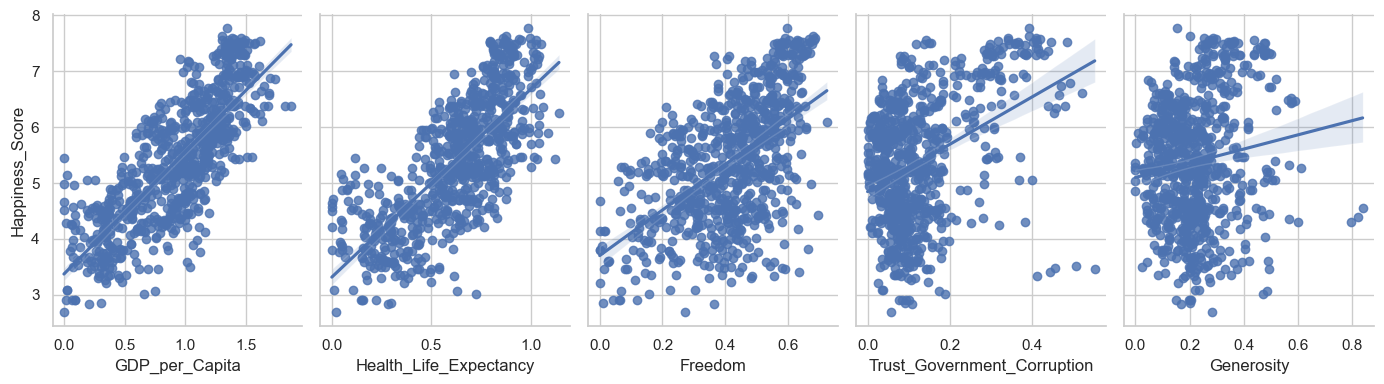

In [47]:
predictors = [
    'GDP_per_Capita',
    'Health_Life_Expectancy',
    'Freedom',
    'Trust_Government_Corruption',
    'Generosity'
]

sns.pairplot(
    df_clean,
    x_vars=predictors,
    y_vars='Happiness_Score',
    height=4,
    aspect=0.7,
    kind='reg',
    diag_kind=None
)

plt.tight_layout()
plt.show()


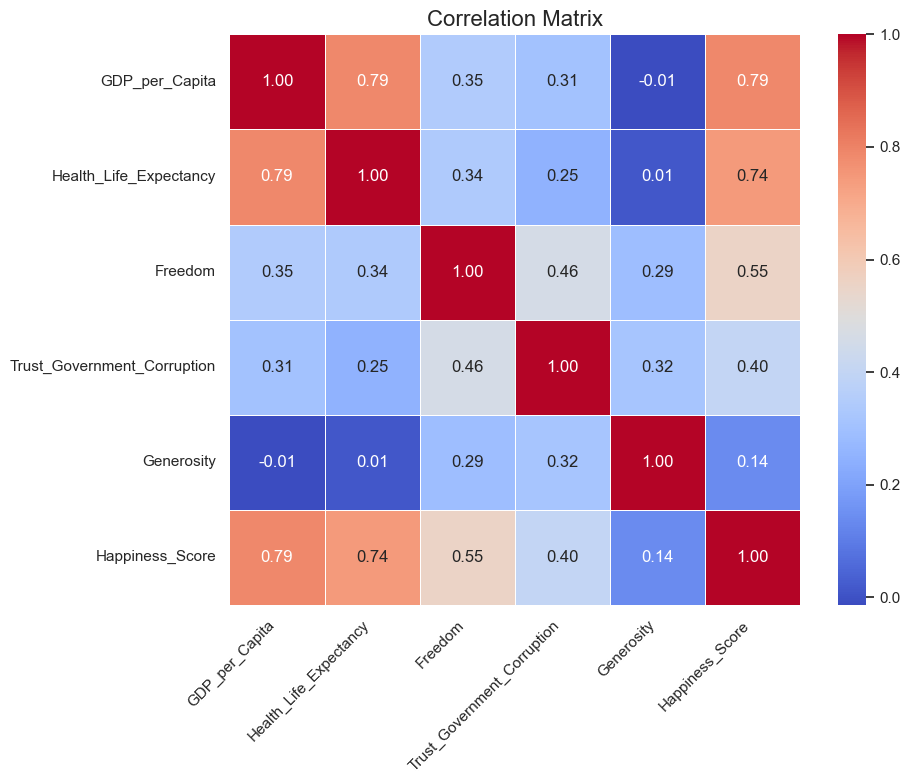

In [48]:

corr = df_clean[predictors + ['Happiness_Score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    square=True
)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Creating our models
#### It seems from the plots, that all predictors have some power. We try to make different models. 
##### 1. With all predictors.
##### 2. Excluding generosity (it also seem to have a low influencing power from the correlation matrix).
##### 3. Taking only those which seem like significant predictors.

In [49]:
# Model 1: All Predictors
formula1 = 'Happiness_Score ~ GDP_per_Capita + Health_Life_Expectancy + Freedom + Trust_Government_Corruption + Generosity'
model1 = smf.ols(formula=formula1, data=df_clean).fit()
print("\nModel 1 Summary (All Predictors):\n")
print(model1.summary())

# Model 2: Excluding 'Generosity' (Adjust based on significance)
formula2 = 'Happiness_Score ~ GDP_per_Capita + Health_Life_Expectancy + Freedom + Trust_Government_Corruption'
model2 = smf.ols(formula=formula2, data=df_clean).fit()
print("\nModel 2 Summary (Excluding Generosity):\n")
print(model2.summary())

# Model 3: Only Significant Predictors (Assuming GDP_per_Capita, Health_Life_Expectancy, and Freedom are significant)
formula3 = 'Happiness_Score ~ GDP_per_Capita + Health_Life_Expectancy + Freedom'
model3 = smf.ols(formula=formula3, data=df_clean).fit()
print("\nModel 3 Summary (Significant Predictors):\n")
print(model3.summary())




Model 1 Summary (All Predictors):

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     451.1
Date:                 lø, 30 nov 2024   Prob (F-statistic):          1.19e-226
Time:                        14:20:48   Log-Likelihood:                -668.60
No. Observations:                 781   AIC:                             1349.
Df Residuals:                     775   BIC:                             1377.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

#### *Model 1 interpretation (Happiness_Score ~ GDP_per_Capita + Health_Life_Expectancy + Freedom + Trust_Government_Corruption + Generosity)*
R-squared (0.744): Approximately 74.4% of the variability in Happiness Scores is explained by the model.
All predictors have significant p-values below 0.05
Freedom is the strongest predictor with a value of 1.92
Generosity seems to be the weakest predictor, although still statistically significant

#### *Model 2 interpretation (Happiness_Score ~ GDP_per_Capita + Health_Life_Expectancy + Freedom + Trust_Government_Corruption)*
R-squared (0.742): Approximately 74.2% of the variability in Happiness Scores is explained by the model.
All predictors have significant p-values below 0.05
Freedom again is the strongest predictor with a value of 2.0041
Trust government corruption in this case to be the weakest predictor, although still statistically significant

#### *Model 3 interpretation (Happiness_Score ~ GDP_per_Capita + Health_Life_Expectancy + Freedom)*
R-squared (0.739): Approximately 73.9% of the variability in Happiness Scores is explained by the model.
All predictors have significant p-values below 0.05
Freedom is yet again the strongest predictor with a value of 2.1950
In this model Health life expectancy is the weakest predictor

#### Freedom in general seems to be a very strong predictor for world happiness. 

In [50]:
# Compare AIC
aic_values = pd.DataFrame({
    'Model': ['All Predictors', 'Excluding Generosity', 'Significant Predictors'],
    'AIC': [model1.aic, model2.aic, model3.aic]
})

print("\nAIC Comparison:")
print(aic_values)


AIC Comparison:
                    Model          AIC
0          All Predictors  1349.194778
1    Excluding Generosity  1353.614692
2  Significant Predictors  1360.989449


#### Model Ranking Based on AIC:

All Predictors (AIC = 1349.19) – Best
Excluding Generosity (AIC = 1353.61) – Second Best
Significant Predictors (AIC = 1360.99) – Least Preferred
Conclusion:

All Predictors is the preferred model based on the lowest AIC, suggesting it offers the best trade-off between fit and complexity among the three models.

Excluding Generosity performs slightly worse, and Significant Predictors is the least preferred based on AIC.


Variance Inflation Factor (VIF) for Model 1 Predictors:
                       Feature        VIF
0                        const  12.931536
1               GDP_per_Capita   2.776541
2       Health_Life_Expectancy   2.676679
3                      Freedom   1.428490
4  Trust_Government_Corruption   1.395117
5                   Generosity   1.181972


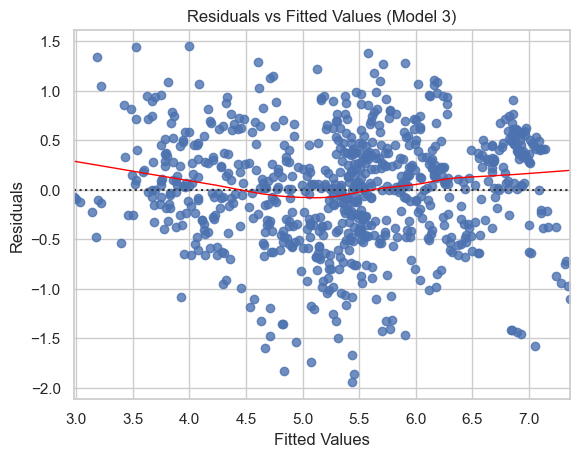

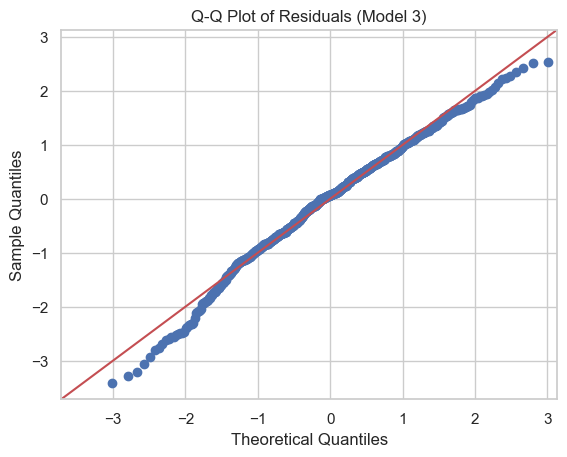

In [ ]:
# Calculate VIF for Model 1 predictors
X = df_clean[predictors]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF) for Model 1 Predictors:")
print(vif_data)

# Residual Plot for Model 3
sns.residplot(x=model1.fittedvalues, y=model1.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Model 1)')
plt.show()

# Q-Q Plot for Model 3 Residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Model 1)')
plt.show()

#### VIF and Residual Diagnostics (only for model 1)
VIF is a score to measure the extent multicollinarity in the model. Scores below 5 indicate low multicollinarity scores. Scores above 10 become critical

GDP_per_Capita (2.776541): Low VIF, indicating minimal multicollinearity.
Health_Life_Expectancy (2.676679): Low VIF.
Freedom (1.428490): Low VIF.
Trust_Government_Corruption (1.395117): Low VIF.
Generosity (1.181972): Low VIF.

Conclusion:
No Significant Multicollinearity: All predictors have VIF values well below the threshold of 5, indicating that multicollinearity is not a concern in your models.
Model Stability: The absence of multicollinearity ensures that the coefficient estimates are reliable and not inflated due to correlated predictors. 

#### Residuals plots (only for model 1)
There seems to be no patterns emerging in the residuals versus fitted plot and it seems to be scattered quite randomly
There seem to be a slight skew at the end of both tails. Though not anything too concerning.